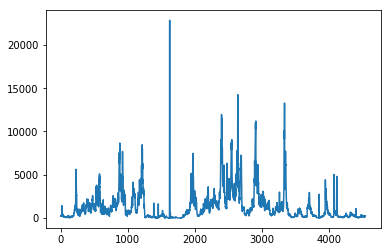

average = 187.19839375641425
coverage = 0.9966944318480154


In [7]:
import pysam
import pyBigWig
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


bw_1000 = open('/Users/dashabalashova/ngs_institute/data/ecoli_mda_1000.bw', 'r')
a = []
for r in bw_1000.read().splitlines():
    a.append(int(r.split('\t')[-1]))


plt.plot(a)
plt.show()

bw = open('/Users/dashabalashova/ngs_institute/data/ecoli_mda.bw', 'r')
a = []
for r in bw.read().splitlines():
    a.append(int(r.split('\t')[-1]))

print('average =', np.mean(a))
print('coverage =', (len(a)-a.count(0))/len(a))

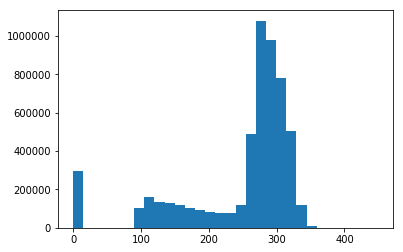

mean = 248.888816208449, sigma = 83.76535242842924
confide interval = (84.71174229642293, 413.06589012047505)


In [6]:
import pysam
import pyBigWig
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

bamfile = pysam.AlignmentFile('/Users/dashabalashova/ngs_institute/data/ecoli_mda.sorted.bam', 'rb')

b=[]
for alignment in bamfile.fetch():
    if abs(alignment.tlen)>=0 and abs(alignment.tlen)<450:
        b.append(abs(alignment.tlen))

    
plt.hist(b,   bins=30)
plt.show()

mean, sigma = np.mean(b), np.std(b)

conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)

print('mean = %s, sigma = %s' %(mean , sigma))
print('confide interval =', conf_int)

In [8]:
import numpy as np
import pandas as pd

a = np.array([[0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0]])

frame = pd.DataFrame(a, index=['A','C','G','T'], columns=['A','C','G','T'])

for alignment in bamfile.fetch():
    if (str(alignment).split()[5])!='None':
        #print(alignment.get_aligned_pairs(matches_only=True, with_seq=True))
        #print(alignment.query_sequence)
        #print(alignment.get_reference_sequence())
        f=alignment.get_aligned_pairs(matches_only=True, with_seq=True)
        for n in range(0,len(f)):
            if f[n][2]=='c':
                u=alignment.query_alignment_sequence[f[n][0]]
                if u in ['A','C','G','T']:                 
                    frame['C'][u]+=1
            if f[n][2]=='a':
                u=alignment.query_alignment_sequence[f[n][0]]
                if u in ['A','C','G','T']:
                    frame['A'][u]+=1
            if f[n][2]=='t':
                u=alignment.query_alignment_sequence[f[n][0]]
                if u in ['A','C','G','T']:
                    frame['T'][u]+=1
            if f[n][2]=='g':
                u=alignment.query_alignment_sequence[f[n][0]]
                if u in ['A','C','G','T']:                
                    frame['G'][u]+=1

        
print(frame)

        A       C       G       T
A       0  374021  238194  243090
C  755169       0  337720  494420
G  489274  331893       0  742680
T  242029  238806  369217       0
